In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, random
from functools import partial, reduce
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.decomposition import PCA

In [158]:
def get_images_and_labels():
    data = pd.read_csv('zip.train.csv')
    labels = data.V1.to_numpy()
    images = data.drop(columns=['Unnamed: 0', 'V1']).to_numpy()
    return images, labels

In [159]:
images, labels = get_images_and_labels()

# Question 1 [50 Points] K-Means Clustering

In [160]:
def showImage(pixels):
    img_pixels = pixels.reshape((16,16))
    plt.imshow(img_pixels, cmap='gray')
    plt.show()

In [161]:
def euclidean_distance(a, b):
    return np.linalg.norm(a-b)

## [15 Points] Write your own code of k-means that iterates between two steps, and stop when the cluster membership does not change.

In [162]:
class KMeans:
    def __init__(self, k):
        self.k = k          
        self.means = None 
        self.labels = None

    def get_item_label(self, x):
        distances = np.zeros(self.k)

        for i in range(self.k):
            centroid = self.means[i]
            distances[i] = euclidean_distance(centroid, x)

        return np.argmin(distances)
    
    
    def get_cluster_labels(self, data):
        cluster_labels = [None] * data.shape[0]

        for index in range(len(data)):
            item = data[index]
            label = self.get_item_label(item)
            cluster_labels[index] = label

        return np.array(cluster_labels)
    
    def get_initial_centroids(self, data):
        return data[np.random.choice(data.shape[0], self.k, replace=False)]

    def train(self, data):
        self.means = self.get_initial_centroids(data)
        
        while True:
            new_labels = self.get_cluster_labels(data)

            if np.array_equal(self.labels, new_labels):
                return

            self.labels = new_labels

            for i in range(self.k):
                i_points = [p for p, a in zip(data, self.labels) if a == i]
                if i_points:
                    self.means[i] = np.mean(i_points, axis=0)

## [10 Points] Perform your algorithm with one random initialization with 

In [163]:
np.random.seed(0)

In [164]:
model = KMeans(5)

In [167]:
model.train(images)

### For this question, compare your cluster membership to the true digits

In [168]:
accuracy_score(y_true=labels, y_pred=model.labels)

0.19064600192017556

### What are the most prevalent digits in each of your clusters?

In [88]:
clusters = {}

In [122]:
for i in range(len(model.labels)):
    label = model.labels[i]
    
    if label in clusters:
        clusters[label].append(labels[i])
    else:
        clusters[label] = [labels[i]]

In [123]:
for i in clusters:
    counts = Counter(clusters[i])
    print(f"Cluster {i+1} top 2 most common numbers: {counts.most_common(2)}")

Cluster 2 top 2 most common numbers: [(6, 1156), (2, 1126)]
Cluster 4 top 2 most common numbers: [(0, 1762), (6, 136)]
Cluster 5 top 2 most common numbers: [(7, 1258), (9, 1218)]
Cluster 1 top 2 most common numbers: [(3, 1230), (5, 766)]
Cluster 3 top 2 most common numbers: [(1, 2006), (4, 114)]


## [10 Points] Perform your algorithm with 10 independent initiations with k = 5 and record the best

In [169]:
accuracies = []
pred_labels = []

In [170]:
for i in range(10):
    model = KMeans(5)
    model.train(images)
    pred_labels.append(model.labels)
    accuracies.append(accuracy_score(y_true=labels, y_pred=model.labels))

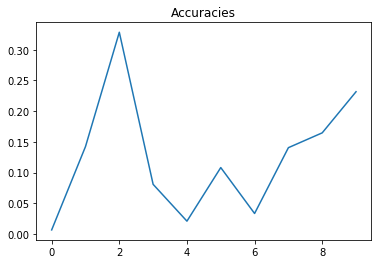

In [172]:
plt.plot(range(10), accuracies)
plt.title('Accuracies')
plt.show()

### For this question, plot your clustering results on a two-dimensional plot, where the two axis are the first two principle components of your data

In [279]:
cluster_images = {}
for i in range(len(pred_labels[2])):
    label = pred_labels[2][i]
    
    if label in cluster_images:
        cluster_images[label].append(images[i])
    else:
        cluster_images[label] = [images[i]]

In [280]:
pca_vals = []

In [281]:
for i in cluster_images:
    pca = PCA(n_components=2)
    X_transformed = pca.fit_transform(cluster_images[i])
    pca_vals.append(X_transformed)

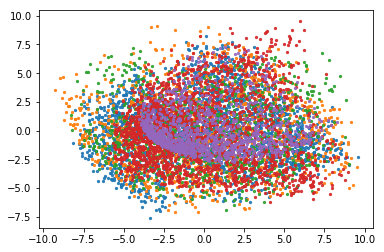

In [284]:
for i in pca_vals:
    plt.scatter(i[:, 0], i[:, 1], alpha=.9, s=5)
plt.show()

## [15 Points] Compare the clustering results from the above two questions with the built-in kmeans() function in R. Use tables/figures to demonstrate your results and comment on your findings.